<a href="https://colab.research.google.com/github/Ayanlola2002/Data-Science-Nigeria/blob/DSN_best_car_price_prediction_2019/best_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [142]:
!kaggle competitions download -c dsn-recruitment-service-test

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#unzippig the us-data file
from shutil import unpack_archive
#unpack_archive('all.zip')
unpack_archive('train.csv.zip')
unpack_archive('test.csv.zip')

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [0]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [0]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [0]:
#train = pd.read_csv('train.csv',parse_dates=[['weblog_date'],['date_of_advert'],['last_advert_online']])
#test = pd.read_csv('test.csv',parse_dates=[weblog_date],[[date_of_advert],[last_advert_online])
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train_copy=train.copy()
test_copy=test.copy()

In [181]:
##display the first five rows of the train dataset.
train.head(50)

,seller_type,country_of_use,weblog_date,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,car_brand,Status_of_car_repair,gear_type,date_of_advert,last_advert_online,model,naira_price,advert_days_diff
0,private,london,2016-03-15,78183,Smart_smart_forfour_pulse,small car,2007,11,95,241350.000,gasoline,smart,nein,manuell,2016-03-15,2016-03-16,forfour,864000,1 days
1,private,london,2016-04-01,47166,Seat_Arosa_1.4_16V,small car,2003,7,101,241350.000,gasoline,seat,nein,manuell,2016-04-01,2016-04-03,arosa,630000,2 days
2,private,london,2016-03-17,44623,Woll_fahrbereit,small car,1999,8,90,241350.000,NAN,opel,NAN,manuell,2016-03-17,2016-04-07,tigra,180000,21 days
3,private,london,2016-03-29,53945,Skoda_Fabia_5_Tuerer_dunkelblau_metallic,limousine,2003,6,68,201125.000,gasoline,skoda,NAN,manuell,2016-03-29,2016-03-29,fabia,432000,0 days
4,private,london,2016-03-24,45886,Verkaufe_mein_Auto_#_Jeep_#_Hyundai_#_Tucson_#,other,2008,0,120,241350.000,NAN,hyundai,NAN,automatik,2016-03-24,2016-04-05,tucson,1692000,12 days
5,private,london,2016-03-11,66976,Renault_Scenic_1.6_16V_RT,bus,2001,12,107,241350.000,gasoline,renault,nein,manuell,2016-03-11,2016-04-07,scenic,540000,27 days
6,private,london,2016-03-12,49733,Mercedes_A170_CDI_mit_neuem_Getriebe,NAN,2018,9,0,241350.000,NAN,mercedes_benz,ja,manuell,2016-03-12,2016-03-12,a_klasse,306000,0 days
7,private,london,2016-03-30,23611,Sommerhammer_!!!_MX5_im_Super_Zustand_mit_neue...,convertible,2005,10,110,201125.000,gasoline,mazda,nein,manuell,2016-03-30,2016-04-07,mx_reihe,1439280,8 days
8,private,london,2016-03-09,13505,C_klasse_180_mit_TÜV__Automatik_Klima.,station wagon,2001,10,122,241350.000,gasoline,mercedes_benz,nein,automatik,2016-03-09,2016-03-12,c_klasse,630000,3 days
9,private,london,2016-03-15,91257,Volvo_V50_2_0D_Kintec,station wagon,2008,12,136,241350.000,diesel,volvo,nein,manuell,2016-03-15,2016-04-05,v50,1512000,21 days


In [150]:
##display the first five rows of the test dataset.
test.head(5)

,id,seller_type,country_of_use,weblog_date,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,car_brand,Status_of_car_repair,gear_type,date_of_advert,last_advert_online,model
0,72959,private,london,2016-03-20,24768,Opel_vectra_B_1.6_16v_tuev_09.2017,limousine,2000,9,101,201125.000,gasoline,opel,nein,automatik,2016-03-20,2016-03-21,vectra
1,8681,private,london,2016-03-27,26629,Aixam_45_km/h_Auto_automatiek_nicht_fahrbereit,other,2005,6,0,32180.000,NaN,sonstige_autos,NaN,automatik,2016-03-27,2016-04-05,NaN
2,238202,private,london,2016-03-22,35606,Passat_Alltrack_Bluemotion,station wagon,2018,1,0,32180.000,diesel,volkswagen,ja,NaN,2016-03-22,2016-04-06,passat
3,110743,private,london,2016-03-28,59192,Opel_Kadett,limousine,1979,9,110,241350.000,gasoline,opel,nein,manuell,2016-03-28,2016-03-31,kadett
4,34925,private,london,2016-04-02,7551,"Seat_Arosa_""Anfaengerauto_Stadtflitzer""_TÜV_02...",small car,2000,8,0,241350.000,gasoline,seat,NaN,manuell,2016-04-02,2016-04-06,arosa


In [151]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (224524, 19) 
The test data size before dropping Id feature is : (110587, 18) 

The train data size after dropping Id feature is : (224524, 18) 
The test data size after dropping Id feature is : (110587, 17) 


In [0]:
#separate categorical varriable from numerical varriable
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
#quantitative.remove('SalePrice')
#quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [153]:
quantitative

['Area_address_code',
 'Permit_registration_year',
 'registration_month',
 'horse_power',
 'mileage',
 'naira_price']

In [154]:
qualitative

['seller_type',
 'country_of_use',
 'weblog_date',
 'car_name',
 'car_type',
 'gas_type',
 'car_brand',
 'Status_of_car_repair',
 'gear_type',
 'date_of_advert',
 'last_advert_online',
 'model']

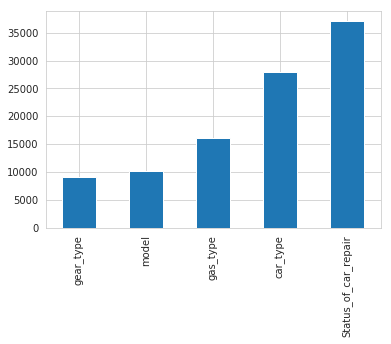

In [155]:
#missing values
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [156]:
# check number & percentage of missing value in the columns
def missing_values_table(df):
  mis_val = df.isnull().sum() #total missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df) #percentage of missing values
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #make a table with the results
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #rename the columns
     # sort the table by percentage of missing value
  mis_val_table_ren_columns = mis_val_table_ren_columns[
  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        #print same summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

          # return the dataframe with missing information
  return mis_val_table_ren_columns
  
missing_values = missing_values_table(train)
missing_values.head()

Your selected dataframe has 18 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Status_of_car_repair,37087,16.500
car_type,27959,12.500
gas_type,16091,7.200
model,10248,4.600
gear_type,9133,4.100


In [0]:
#handling Missing Values
train["Status_of_car_repair"] =train["Status_of_car_repair"].fillna("NAN")
test["Status_of_car_repair"] =test["Status_of_car_repair"].fillna("NAN")

#handling Missing Values
train["car_type"] =train["car_type"].fillna("NAN")
test["car_type"] =test["car_type"].fillna("NAN")
#handling Missing Values
train["gas_type"] =train["gas_type"].fillna("NAN")
test["car_type"] =test["car_type"].fillna("NAN")
#handling Missing Values
train["model"] =train["model"].fillna("NAN")
test["model"] =test["model"].fillna("NAN")

#handling Missing Values
train["gear_type"] =train["gear_type"].fillna("NAN")
test["gear_type"] =test["gear_type"].fillna("NAN")

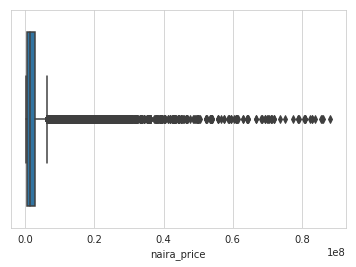

In [158]:
#remove outliers
sns.boxplot(x=train['naira_price'])

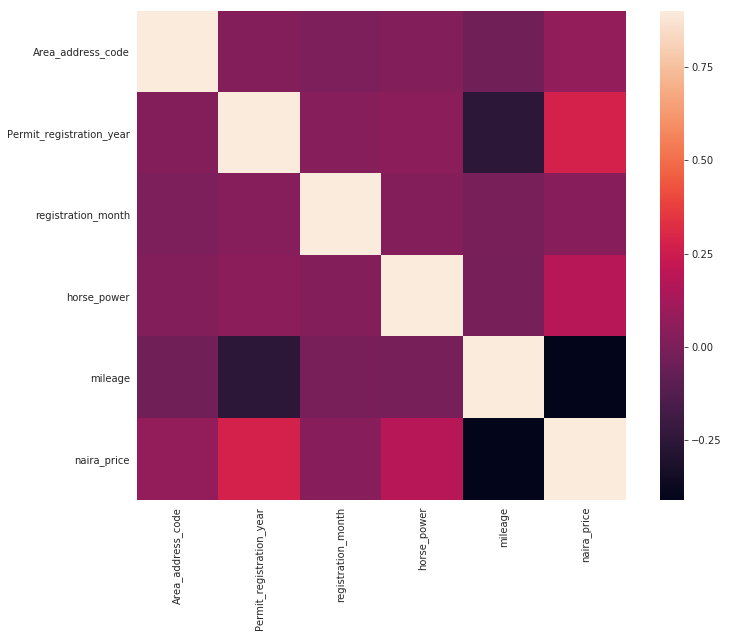

In [159]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [160]:
#the category types
['seller_type',
 'country_of_use',
 'weblog_date',
 'car_name',
 'car_type',
 'gas_type',
 'car_brand',
 'Status_of_car_repair',
 'gear_type',
 'date_of_advert',
 'last_advert_online',
 'model']

['seller_type',
 'country_of_use',
 'weblog_date',
 'car_name',
 'car_type',
 'gas_type',
 'car_brand',
 'Status_of_car_repair',
 'gear_type',
 'date_of_advert',
 'last_advert_online',
 'model']

In [161]:
train['seller_type'].value_counts()


private    224524
Name: seller_type, dtype: int64

In [162]:
train['country_of_use'].value_counts()

london    224524
Name: country_of_use, dtype: int64

In [0]:
#train['weblog_date'].value_counts()

In [0]:
# converting dates into datetime format

train['weblog_date'] = pd.to_datetime(train['weblog_date'], errors = 'coerce')
#train['date_of_advert'] = pd.to_datetime(train['date_of_advert'], errors = 'coerce')
train['last_advert_online'] = pd.to_datetime(train['last_advert_online'], errors = 'coerce')
# extracting out years, months, days and weeks from the date
#train['weblog_date_year'] = train['weblog_date'].dt.year
#train['weblog_date_month'] = train['weblog_date'].dt.month
#train['date_of_advert_year'] = train['date_of_advert'].dt.year
#train['date_of_advert_month'] = train['date_of_advert'].dt.month
#train['last_advert_online_year'] = train['last_advert_online'].dt.year
#train['last_advert_online_month'] = train['last_advert_online'].dt.month




In [0]:
test['weblog_date'] = pd.to_datetime(test['weblog_date'], errors = 'coerce')
#test['date_of_advert'] = pd.to_datetime(test['date_of_advert'], errors = 'coerce')
test['last_advert_online'] = pd.to_datetime(test['last_advert_online'], errors = 'coerce')

# extracting out years, months, days and weeks from the date

#test['weblog_date_year'] = test['weblog_date'].dt.year
#test['weblog_date_month'] = test['weblog_date'].dt.month

#test['date_of_advert_year'] = test['date_of_advert'].dt.year
#test['date_of_advert_month'] = test['date_of_advert'].dt.month

#test['last_advert_online_year'] = test['last_advert_online'].dt.year
#test['last_advert_online_month'] = test['last_advert_online'].dt.month

In [0]:
#Difference advert dates in days
train['advert_days_diff']=train['last_advert_online']-train['weblog_date']

In [0]:
#Difference advert dates in days
test['advert_days_diff']=test['last_advert_online']-test['weblog_date']

In [169]:
#getting unique values of categorical columns
#the category types
#['seller_type',
 #'country_of_use',
 #'weblog_date',
 #'car_name',
 #'car_type',
 #'gas_type',
 #'car_brand',
 #'Status_of_car_repair',
 #'gear_type',
 #'date_of_advert',
 #'last_advert_online',
 #'model']
train['seller_type'].unique()

array(['private'], dtype=object)

In [170]:
train['country_of_use'].unique()

array(['london'], dtype=object)

In [171]:
train['car_type'].unique()

array(['small car', 'limousine', 'other', 'bus', 'NAN', 'convertible',
       'station wagon', 'coupé'], dtype=object)

In [172]:
train['gas_type'].unique()

array(['gasoline', 'NAN', 'diesel', 'liquefied petroleum gas',
       'compressed natural gas', 'other'], dtype=object)

In [173]:
train['car_brand'].unique()

array(['smart', 'seat', 'opel', 'skoda', 'hyundai', 'renault',
       'mercedes_benz', 'mazda', 'volvo', 'volkswagen', 'sonstige_autos',
       'citroen', 'nissan', 'audi', 'fiat', 'bmw', 'toyota', 'porsche',
       'ford', 'peugeot', 'mitsubishi', 'mini', 'subaru', 'trabant',
       'honda', 'suzuki', 'alfa_romeo', 'jeep', 'rover', 'chevrolet',
       'kia', 'land_rover', 'vauxhall', 'dacia', 'innoson', 'chrysler',
       'saab', 'daewoo', 'daihatsu', 'lotus'], dtype=object)

In [175]:
train['model'].unique()

array(['forfour', 'arosa', 'tigra', 'fabia', 'tucson', 'scenic',
       'a_klasse', 'mx_reihe', 'c_klasse', 'v50', 'lupo', 'polo',
       'touareg', 'NAN', 'c4', 'micra', 'golf', 'q5', 'toledo', 'santa',
       'v40', 'andere', '100', '3er', 'corsa', 'yaris', 'clk', 'cl',
       'punto', 'cayenne', 'corolla', 'vito', 'focus', 'passat',
       'x_reihe', '2_reihe', '1_reihe', 'astra', 'seicento',
       'transporter', 'a4', 'colt', 'octavia', 'c_reihe', '5er', 'cooper',
       'vectra', 'insignia', '3_reihe', 'a6', 'fiesta', 'agila',
       'impreza', '7er', 'accord', 'a3', 'beetle', '147', 'grand', 'leon',
       'combo', 'megane', 'twingo', 'clio', 'z_reihe', 'xc_reihe', '1er',
       'phaeton', 'ibiza', 'verso', 'slk', 'civic', 'a5', 'swift', 'rav',
       'caddy', 'up', 'touran', 'yeti', 'sharan', '4_reihe', 'matiz',
       'i_reihe', 'stilo', 'e_klasse', 'mondeo', 'wrangler', 'kangoo',
       'superb', 'fortwo', 'meriva', 'bora', 'sportage', 'cordoba', 'a1',
       'm_klasse', 'leg

In [180]:
train['car_name'].unique()

array(['Smart_smart_forfour_pulse', 'Seat_Arosa_1.4_16V',
       'Woll_fahrbereit', ..., 'Seat_Leon_Schlachtfest',
       'Ford_Ghia_1_4___Defekt',
       'BMW_320i__2._Hand__Nichtraucher__BMW_Sceckheft__Navi__Glasdach...'],
      dtype=object)

In [0]:
 #remove this features model,weblogdate,country_of_use,car_name
train.drop(['date_of_advert','weblog_date','last_advert_online','car_name','model'],inplace=True,axis=1)

In [0]:
 test.drop(['date_of_advert','weblog_date','last_advert_online','car_name','model'],inplace=True,axis=1)

In [131]:
train.head()

,seller_type,country_of_use,Area_address_code,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,car_brand,Status_of_car_repair,gear_type,naira_price,advert_days_diff
0,private,london,78183,small car,2007,11,95,241350.000,gasoline,smart,nein,manuell,864000,1 days
1,private,london,47166,small car,2003,7,101,241350.000,gasoline,seat,nein,manuell,630000,2 days
2,private,london,44623,small car,1999,8,90,241350.000,NAN,opel,NAN,manuell,180000,21 days
3,private,london,53945,limousine,2003,6,68,201125.000,gasoline,skoda,NAN,manuell,432000,0 days
4,private,london,45886,other,2008,0,120,241350.000,NAN,hyundai,NAN,automatik,1692000,12 days


In [0]:
test.head()

,seller_type,country_of_use,Area_address_code,car_name,car_type,Permit_registration_year,registration_month,horse_power,mileage,gas_type,car_brand,Status_of_car_repair,gear_type,model,weblog_date_year,weblog_date_month,date_of_advert_year,date_of_advert_month,last_advert_online_year,last_advert_online_month
0,private,london,24768,Opel_vectra_B_1.6_16v_tuev_09.2017,limousine,2000,9,101,201125.000,gasoline,opel,nein,automatik,vectra,2016,3,2016,3,2016,3
1,private,london,26629,Aixam_45_km/h_Auto_automatiek_nicht_fahrbereit,other,2005,6,0,32180.000,NaN,sonstige_autos,NAN,automatik,NAN,2016,3,2016,3,2016,4
2,private,london,35606,Passat_Alltrack_Bluemotion,station wagon,2018,1,0,32180.000,diesel,volkswagen,ja,NAN,passat,2016,3,2016,3,2016,4
3,private,london,59192,Opel_Kadett,limousine,1979,9,110,241350.000,gasoline,opel,nein,manuell,kadett,2016,3,2016,3,2016,3
4,private,london,7551,"Seat_Arosa_""Anfaengerauto_Stadtflitzer""_TÜV_02...",small car,2000,8,0,241350.000,gasoline,seat,NAN,manuell,arosa,2016,4,2016,4,2016,4


In [0]:
train_ID=train_ID.astype(float)

In [0]:
dtypes(train_ID)

NameError: ignored

In [0]:

#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(quantitative,train_ID)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(quantitative.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [0]:
train['car_type'].value_counts()

limousine        60125
small car        45814
station wagon    42371
NAN              27959
bus              19639
convertible      14952
coupé            11735
other             1929
Name: car_type, dtype: int64

In [0]:
def car_type_cat(cat):
  if cat=='limousine':
    return 1
  elif cat=='small car':
    return 2
  elif cat=='station wagon':
    return 3
  elif cat=='bus':
    return 4
  elif cat=='convertible':
    return 5
  elif cat=='coupé':
    return 6
  else:
    return 7
  

In [0]:
train['gas_type'].value_counts()

gasoline                   134042
diesel                      70531
NAN                         16091
liquefied petroleum gas      3405
compressed natural gas        367
other                          88
Name: gas_type, dtype: int64

In [0]:
def gas_type_cat(cat):
  if cat=='gasoline':
    return 1
  elif cat=='diesel':
    return 2
  elif cat=='liquefied petroleum gas':
    return 3
  elif cat=='compressed natural gas':
    return 4
  else:
    return 5


In [0]:
train['car_type']=train['car_type'].apply(car_type_cat)
test['car_type']=test['car_type'].apply(car_type_cat)

In [0]:
train['gas_type']=train['gas_type'].apply(gas_type_cat)
test['gas_type']=test['gas_type'].apply(gas_type_cat)

In [0]:
train['car_brand'].value_counts()

volkswagen        47796
bmw               25443
mercedes_benz     22868
opel              22598
audi              20822
ford              14369
renault           10081
peugeot            6669
fiat               5486
seat               4237
skoda              3648
smart              3435
mazda              3417
citroen            3165
toyota             3056
nissan             2940
hyundai            2317
mini               2233
volvo              2073
sonstige_autos     2042
mitsubishi         1757
honda              1720
kia                1616
porsche            1465
suzuki             1416
alfa_romeo         1384
chevrolet          1185
chrysler            877
dacia               579
jeep                521
land_rover          505
subaru              446
daihatsu            412
innoson             391
saab                334
daewoo              294
trabant             266
vauxhall            263
rover               256
lotus               142
Name: car_brand, dtype: int64

In [0]:
train['Status_of_car_repair'].value_counts()

nein    169545
ja       17892
Name: Status_of_car_repair, dtype: int64

In [0]:
train['gear_type'].value_counts()

manuell      165717
automatik     49674
Name: gear_type, dtype: int64

In [0]:
train['date_of_advert'].value_counts()

2016-04-03    8869
2016-04-04    8526
2016-03-20    8322
2016-03-12    8059
2016-03-21    7967
2016-03-28    7921
2016-03-14    7896
2016-04-02    7876
2016-03-07    7795
2016-03-19    7700
2016-04-01    7641
2016-03-09    7634
2016-03-29    7595
2016-03-30    7461
2016-03-08    7439
2016-03-15    7412
2016-03-11    7412
2016-03-25    7383
2016-03-10    7369
2016-03-26    7275
2016-03-22    7220
2016-03-31    7121
2016-03-23    7116
2016-03-17    7031
2016-03-16    6832
2016-03-27    6748
2016-03-24    6659
2016-03-05    5109
2016-03-13    3865
2016-03-06    3443
              ... 
2016-02-01       2
2015-12-30       2
2016-01-23       2
2016-01-22       2
2015-11-23       2
2015-12-06       1
2016-01-20       1
2015-03-20       1
2015-11-24       1
2015-06-11       1
2016-02-08       1
2016-01-06       1
2016-01-03       1
2016-01-07       1
2015-11-02       1
2015-08-10       1
2016-01-26       1
2015-11-10       1
2015-08-07       1
2015-06-18       1
2015-09-09       1
2016-02-04  

In [0]:
train['last_advert_online'].value_counts()

2016-04-06    49979
2016-04-07    29763
2016-04-05    28919
2016-03-17     6419
2016-04-04     5679
2016-04-03     5639
2016-04-02     5591
2016-03-31     5337
2016-04-01     5267
2016-03-30     5230
2016-03-29     5115
2016-03-12     5087
2016-03-28     4924
2016-03-22     4499
2016-03-21     4426
2016-03-20     4418
2016-03-24     4264
2016-03-25     4189
2016-03-23     3962
2016-03-27     3740
2016-03-16     3643
2016-03-19     3632
2016-03-15     3592
2016-03-26     3484
2016-03-11     2820
2016-03-14     2657
2016-03-10     2578
2016-03-09     2187
2016-03-13     1868
2016-03-08     1756
2016-03-18     1549
2016-03-07     1133
2016-03-06      909
2016-03-05      269
Name: last_advert_online, dtype: int64

In [0]:
#extracting year and month from date
!conda update pandas

In [0]:
train['model'].value_counts()

golf                  17987
andere                16041
3er                   12849
polo                   7176
corsa                  6558
a4                     6508
passat                 6458
astra                  6346
c_klasse               5675
5er                    5532
e_klasse               4930
a3                     4290
a6                     3891
focus                  3635
transporter            3480
fiesta                 3140
2_reihe                3084
fortwo                 2886
a_klasse               2767
1er                    2530
twingo                 2508
vectra                 2361
touran                 2323
3_reihe                2044
clio                   2014
mondeo                 1988
zafira                 1983
punto                  1813
megane                 1717
ibiza                  1643
                      ...  
range_rover_sport        53
crossfire                49
gl                       44
range_rover_evoque       43
lanos               

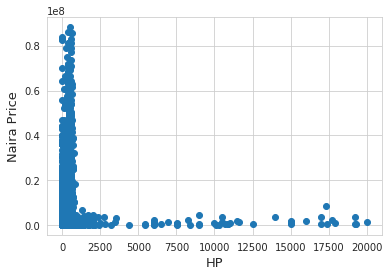

In [0]:
#check outliars
fig, ax = plt.subplots()
ax.scatter(x = train['horse_power'], y = train['naira_price'])
plt.ylabel('Naira Price', fontsize=13)
plt.xlabel('HP', fontsize=13)
plt.show()

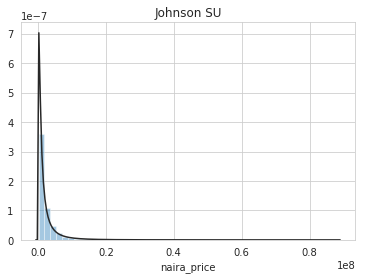

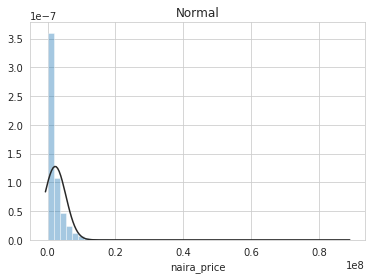

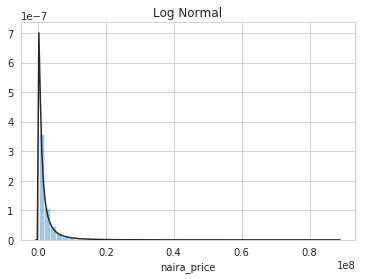

In [0]:
#handling the prize predictor varriable
y = train['naira_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)


 mu = 2262567.00 and sigma = 3123093.25



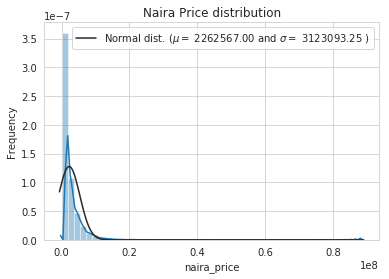

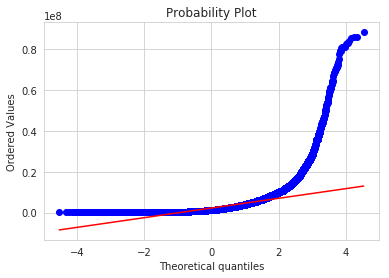

In [0]:
sns.distplot(train['naira_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['naira_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Naira Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['naira_price'], plot=plt)
plt.show()


 mu = 14.06 and sigma = 1.07



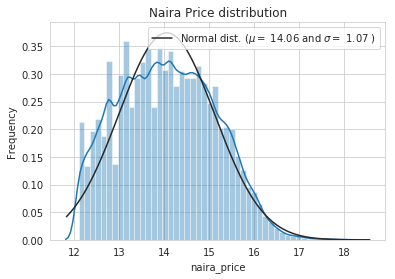

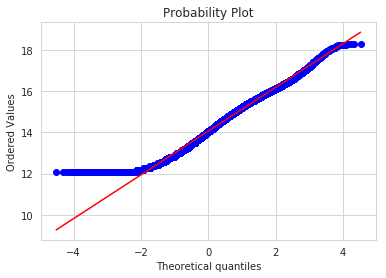

In [0]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["naira_price"] = np.log1p(train["naira_price"])

#Check the new distribution 
sns.distplot(train['naira_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['naira_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Naira Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['naira_price'], plot=plt)
plt.show()